First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    

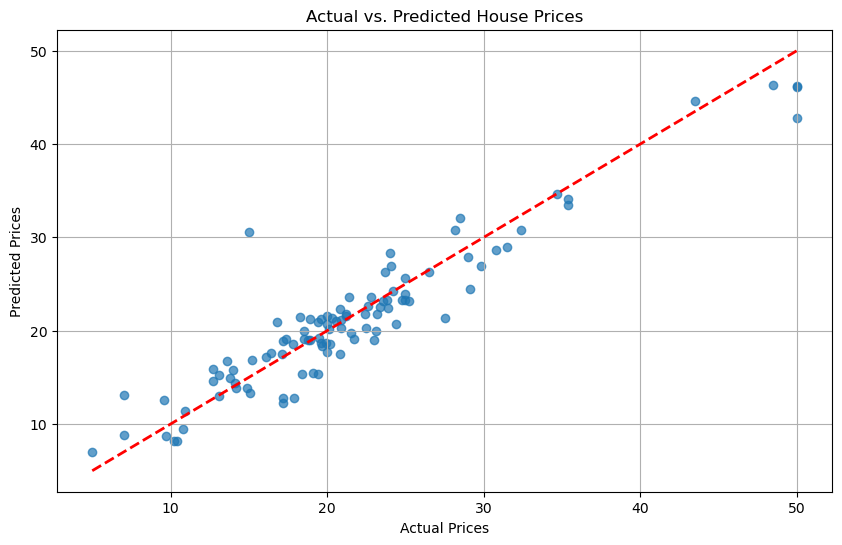

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
try:
    data = pd.read_csv(r'/home/rguktrkvalley/Downloads/HousingData.csv')
except FileNotFoundError:
    print("HousingData.csv not found. Please make sure the file is in the correct directory.")
    exit()

# --- Data Preprocessing ---

# Display the first few rows of the dataframe to understand the data
print("First 5 rows of the dataset:")
print(data.head())

# Get information about the dataset, including missing values
print("\nDataset Info:")
data.info()

# Handle missing values
# Based on the output of data.info(), we can see which columns have missing values.
# For this dataset, a common approach is to fill missing values with the median or mean.
# Let's use the median for all columns with missing values.
for col in data.columns[data.isnull().any()]:
    data[col] = data[col].fillna(data[col].median())

# Re-check for missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())

# --- Feature Selection and Data Splitting ---

# Define features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training ---

# Initialize the RandomForestRegressor model
# n_estimators is the number of trees in the forest.
# random_state ensures reproducibility.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# --- Model Evaluation ---

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- Visualization ---

# Create a scatter plot to visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.savefig("actual_vs_predicted.png")

print("\nA scatter plot of actual vs. predicted prices has been saved as 'actual_vs_predicted.png'")